In [1]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/EdJ7RoWcU48", width=1920/4, height=1080/4)
#<iframe width="560" height="315" src="https://www.youtube.com/embed/EdJ7RoWcU48" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [2]:
import numpy as np
import qiskit
from qiskit import Aer, QuantumCircuit, execute

from qiskit.algorithms import Shor

from qiskit.visualization import plot_histogram as ph
from qiskit.utils import QuantumInstance
from qiskit.exceptions import MissingOptionalLibraryError as mole

In [3]:
backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)

In [4]:
N = 15
my_shor = Shor(quantum_instance=quantum_instance)
result = my_shor.factor(N)
print(result)
#print('The list of factors of %d are %s.' % (N, result.factors[0]))
# 'Circuit execution failed: ERROR:
# [Experiment 0] Insufficient memory to run circuit Shor(N=1523, a=2) 
# using the statevector simulator. 
# Required memory: 1073741824M, max memory: 15229M'

{'factors': [[3, 5]], 'successful_counts': 2, 'total_counts': 4}


In [5]:
def c_amod15(a, power):
    U = QuantumCircuit(4)
    for iteration in range(power):
        U.swap(2,3)
        U.swap(1,2)
        U.swap(0,1)
        for q in range(4):
            U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

In [6]:
n_count = 8
a = 7

In [7]:
def qft_dagger(n):
    qc = QuantumCircuit(n)
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = 'QFT dagger'
    return qc

In [8]:
qc = QuantumCircuit(n_count + 4, n_count)

for q in range(n_count):
    qc.h(q)
    
qc.x(3 + n_count)

for q in range(n_count):
    qc.append(c_amod15(a, 2**q), [q] + [i+n_count for i in range(4)])
    
qc.append(qft_dagger(n_count), range(n_count))
qc.measure(range(n_count), range(n_count))
qc.draw('text')

┌───┐                                                            »
 q_0: ┤ H ├───────■────────────────────────────────────────────────────»
      ├───┤       │                                                    »
 q_1: ┤ H ├───────┼──────────────■─────────────────────────────────────»
      ├───┤       │              │                                     »
 q_2: ┤ H ├───────┼──────────────┼──────────────■──────────────────────»
      ├───┤       │              │              │                      »
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■───────»
      ├───┤       │              │              │              │       »
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      └───┘┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐»
 q_8: ─────┤0            ├┤0            ├┤0            ├┤0            ├»
           │             ││             ││             ││             │»
 q_9: ─────┤1            ├┤1            ├┤1            ├┤1            ├»
           │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 │»
q_10: ─────┤2            ├┤2            ├┤2            ├┤2            ├»
      ┌───┐│             ││             ││             ││             │»
q_11: ┤ X ├┤3            ├┤3            ├┤3            ├┤3            ├»
      └───┘└─────────────┘└─────────────┘└─────────────┘└─────────────┘»
 c: 8/═════════════════════════════════════════════════════════════════»
                                                                       »
«                                                                       »
« q_0: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_1: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_2: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_3: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_4: ───────■─────────────────────────────────────────────────────────»
«             │                                                         »
« q_5: ───────┼───────────────■─────────────────────────────────────────»
«             │               │                                         »
« q_6: ───────┼───────────────┼───────────────■─────────────────────────»
«             │               │               │                         »
« q_7: ───────┼───────────────┼───────────────┼────────────────■────────»
«      ┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐»
« q_8: ┤0             ├┤0             ├┤0             ├┤0              ├»
«      │              ││              ││              ││               │»
« q_9: ┤1             ├┤1             ├┤1             ├┤1              ├»
«      │  7^16 mod 15 ││  7^32 mod 15 ││  7^64 mod 15 ││  7^128 mod 15 │»
«q_10: ┤2             ├┤2             ├┤2             ├┤2              ├»
«      │              ││              ││              ││               │»
«q_11: ┤3             ├┤3             ├┤3             ├┤3              ├»
«      └──────────────┘└──────────────┘└──────────────┘└───────────────┘»
« c: 8/═════════════════════════════════════════════════════════════════»
«                                                                       »
«      ┌─────────────┐┌─┐            

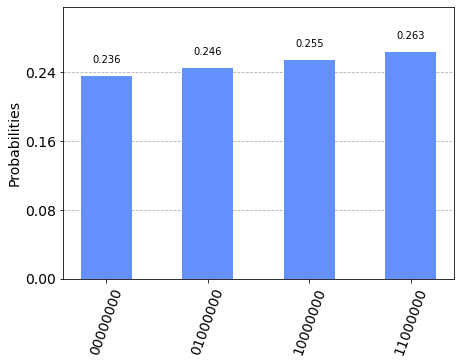

In [9]:
results = execute(qc, backend, shots = 2048).result()
counts = results.get_counts()
ph(counts)

In [10]:
# gives 0, 64, 128 and 192/256 in binary (guesses for r)

In [11]:
# https://qiskit.org/documentation/tutorials/algorithms/08_factorizers.html

In [12]:
from qiskit.tools.jupyter import *
%qiskit_version_table